### An intuitive visualisation of PCA
(PythonDataScienceHandbook/05.09-principal-component-analysis.html)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

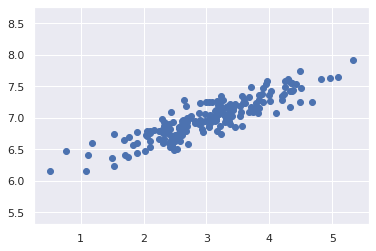

In [108]:
# Create random data with correlated x, y values
rng = np.random.RandomState(1)
#X = rng.randn(2, 200).T      # Random data
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T + [3, 7]     # x/y correlated
#X = np.dot([[1.2, 1], [0.4, 0.6]], rng.randn(2, 200)).T  # tune x/y correlation
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [110]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


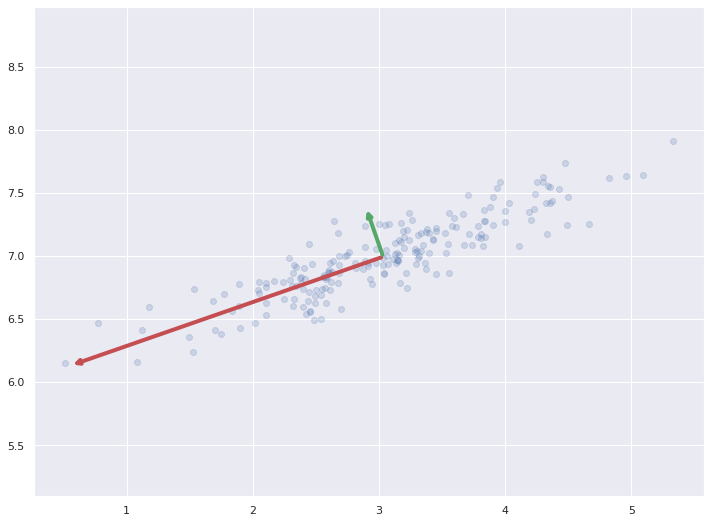

In [120]:
# Plot PCA components

plt.figure(figsize=(12, 9))

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
ax = plt.gca()
myc = ['r', 'g']
for eigVec, eigVal, c in zip(pca.components_, pca.explained_variance_, myc):
    pStart = pca.mean_
    pEnd = pca.mean_ + np.sqrt(eigVal) * eigVec * 3
    ax.annotate('', pEnd, pStart, arrowprops=dict(arrowstyle='->', linewidth=4, color=c))
plt.axis('equal');

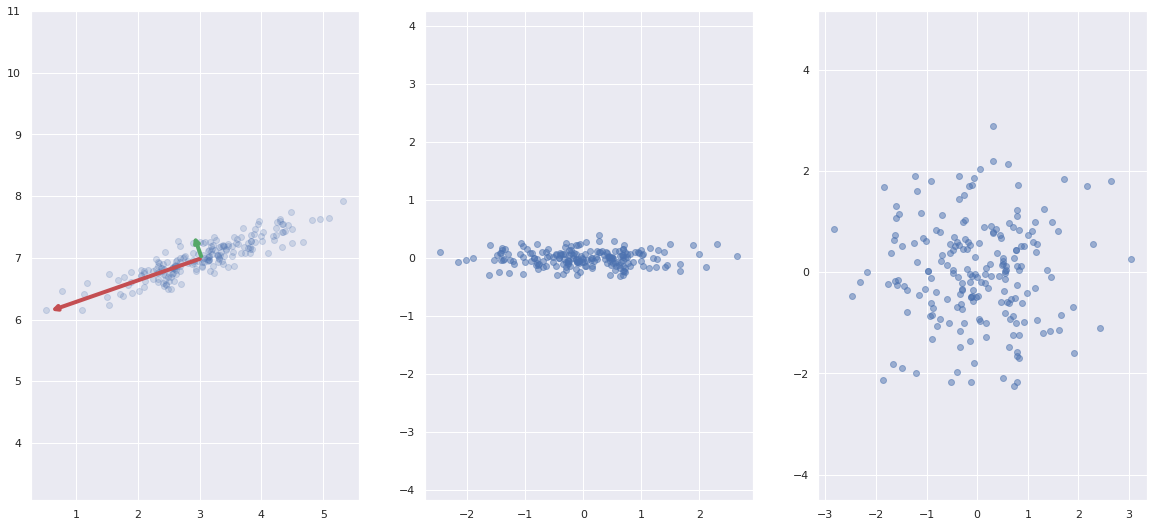

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(20, 9))

axes[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
myc = ['r', 'g']
for eigVec, eigVal, c in zip(pca.components_, pca.explained_variance_, myc):
    pStart = pca.mean_
    pEnd = pca.mean_ + np.sqrt(eigVal) * eigVec * 3
    axes[0].annotate('', pEnd, pStart, arrowprops=dict(arrowstyle='->', linewidth=4, color=c))
axes[0].axis('equal');

X_pca = pca.transform(X)
X_pca_norm = X_pca.copy()
X_pca_norm[:,0] = X_pca_norm[:, 0] / np.sqrt(pca.explained_variance_[0])
X_pca_norm[:,1] = X_pca_norm[:, 1] / np.sqrt(pca.explained_variance_[1])

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
axes[1].axis('equal')
                                             
axes[2].scatter(X_pca_norm[:, 0], X_pca_norm[:, 1], alpha=0.5)
axes[2].axis('equal');
